In [2]:
import pandas as pd
from skimpy import skim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from neuralforecast import NeuralForecast
from mlforecast import MLForecast
from statsforecast.models import Naive, SeasonalNaive, SimpleExponentialSmoothing
from neuralforecast.models import LSTM, GRU, NBEATS, TFT

In [39]:
def prepare_and_clean_frames(master_df, post_code, housing_type):
    unit_code = master_df[(master_df['postcode'] == post_code) & (master_df['propertyType'] == housing_type)].sort_values('datesold')

    unit_code_final = unit_code.groupby(['datesold_year', 'datesold_month']).agg({
    'postcode':'count', 'price':'sum', 'propertyType':pd.Series.mode, 'bedrooms':'sum', 
    }).reset_index()

    unit_code_final['full_date'] = pd.to_datetime(
        unit_code_final['datesold_year'].astype(str) + '-' + unit_code_final['datesold_month'].astype(str) + '-01'
        )
    unit_code_final['price/bedroom'] = unit_code_final['price']/unit_code_final['bedrooms']

    unit_code_final = unit_code_final.drop(['datesold_year', 'datesold_month','price', 'bedrooms'], axis=1)

    date_range = pd.date_range(start=unit_code_final['full_date'].min(), end=unit_code_final['full_date'].max(), freq='MS')
    missing_dates = date_range.difference(unit_code_final['full_date'])

    missing_df = pd.DataFrame({
        'postcode':post_code,
        'propertyType':housing_type,
        'full_date': missing_dates,
        'price/bedroom':np.nan
    })

    full_data = pd.concat([missing_df,unit_code_final]).sort_values('full_date')

    full_data['price/bedroom'] = full_data['price/bedroom'].ffill()

    return full_data


In [4]:
df = pd.read_csv('raw_sales.csv')

In [48]:
test = prepare_and_clean_frames(df, df['postcode'].unique()[0], 'house')

In [49]:
test['price/bedroom'] = test['price/bedroom'].ffill()

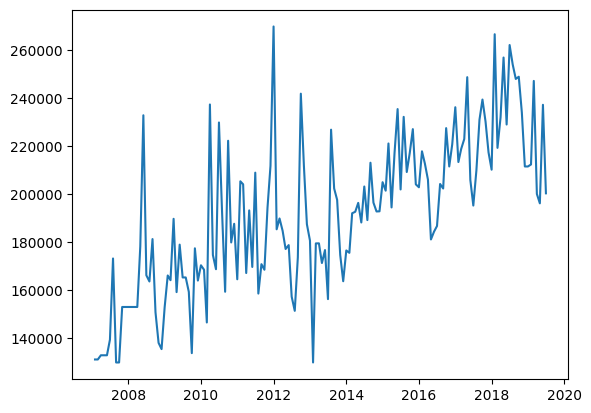

In [50]:
plt.plot(test['full_date'], test['price/bedroom'])

In [20]:
test

,datesold_year,datesold_month,postcode,price,propertyType,bedrooms,price/bedroom,full_date
0,2007,7,1,480000,unit,3,160000.000000,2007-07-01
1,2007,12,1,279950,unit,2,139975.000000,2007-12-01
2,2008,11,1,240000,unit,2,120000.000000,2008-11-01
3,2009,3,1,378500,unit,3,126166.666667,2009-03-01
4,2009,4,2,551000,unit,4,137750.000000,2009-04-01
...,...,...,...,...,...,...,...,...
73,2018,12,2,725000,unit,5,145000.000000,2018-12-01
74,2019,2,3,922000,unit,5,184400.000000,2019-02-01
75,2019,4,2,635375,unit,3,211791.666667,2019-04-01
76,2019,5,1,175000,unit,1,175000.000000,2019-05-01


In [15]:
test['datesold_year']

0     2007
1     2007
2     2008
3     2009
4     2009
      ... 
73    2018
74    2019
75    2019
76    2019
77    2019
Name: datesold_year, Length: 78, dtype: int64

In [17]:
test['full_date'] = pd.to_datetime(test['datesold_year'].astype(str) + '-' + test['datesold_month'].astype(str) + '-01')

In [ ]:
etst

In [6]:
x[0]

,datesold_year,datesold_month,postcode,price,propertyType,bedrooms,price/bedroom
0,2007,7,1,480000,unit,3,160000.000000
1,2007,12,1,279950,unit,2,139975.000000
2,2008,11,1,240000,unit,2,120000.000000
3,2009,3,1,378500,unit,3,126166.666667
4,2009,4,2,551000,unit,4,137750.000000
...,...,...,...,...,...,...,...
73,2018,12,2,725000,unit,5,145000.000000
74,2019,2,3,922000,unit,5,184400.000000
75,2019,4,2,635375,unit,3,211791.666667
76,2019,5,1,175000,unit,1,175000.000000
